# Examples of Chapter 05 - X-ray Image Representation

Mery, D.; Pieringer, C. (2020): Computer Vision for X-ray Testing, 2nd Edition, Springer.


In this chapter, there are following examples:


* Example 5.1: Geometric features
* Example 5.2: Elliptical features
* Example 5.3: Invariant moments
* Example 5.4: Intenisty features
* Example 5.5: Defect detection usin contrast features
* Example 5.6: Crossing line profiles (CLP)
* Example 5.7: SIFT
* Example 5.8: feature selection
* Example 5.9: Example using intenisty features
* Example 5.10: Example using geometric features




# Environment Setup
Download and install in Colab required packages and import libraries.

## Installation of PyXvis Module

## Images of the Dataset
Downloading of X-ray images of GDXray that are used in these examples. GDXray

In [1]:
# !pip install pyxvis

In [2]:
# !mkdir ~/GDXray
# !mkdir ~/GDXray/Baggages

In [3]:
# !wget https://www.dropbox.com/s/axcs36960c6ulmc/B0002.zip
# !unzip -oq B0002.zip
# !rm B0002.zip
# !rsync -av B0002 ~/GDXray/Baggages/

In [4]:
# !wget https://www.dropbox.com/s/sv6657lm21iv2aq/images.zip
# !unzip -oq images.zip
# !rm images.zip

# !wget https://www.dropbox.com/s/zryo14pmsrpjpui/data.zip
# !unzip -oq data.zip
# !rm data.zip

In [5]:
# !ls ~/GDXray/Baggages/B0002

## Installation of Libraries

# Example 5.1: Geometric features

In this example, we show how to extract the basic geometric features of ten apples as segmented in X-ray image N0001_0004b.png. The segmentation in this example is performed by thresholding the X-ray image and by selecting those segmented objects that present an appropriate size (area).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from pyxvis.features.extraction import extract_features

# Input Image
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.imread('images/N0001_0004b.png')
implot = plt.imshow(img, cmap='gray')

# Segmentation   
R = img > 0.27         # thresholding of light objects
L = label(R)         # labeling of objects
n = np.max(L)        # number of detected objects
T = np.zeros((n, 18)) # features of each object will stored in a row

# Analysis of each segmented object
t = 0 # count of recognized fruits
for i in range(n):
  R = (L == i) * 1                         # binary image of object i
  f = extract_features('basicgeo', bw=R)  # feature extraction for object i
  area = f[4]
  
  # recognition of fruits according to the size
  if (area > 14000) and (area < 21000):
    T[t,:] = f                         # storing the features of the fruit t
    t = t + 1
    # labeling each recognized fruit in the plot
    ax.text(f[1]-20, f[0]+10, str(t), fontsize=12,color='Red')

# Display and save results
plt.show()
F = T[0:t,:]
print('Basic Geo-Features:')
print(F)
np.save('GeoFeatures.npy',F)               # save features

ModuleNotFoundError: No module named 'pybalu.feature_extraction.geometric_utils'

The reader can observe the use of function `extract_features` of PyXvis to extract the basic geometric features.

# Example 5.2: Elliptical features

In this example, we show how to extract elliptical features of a shape. We test this approach on an X-ray of a cherry with an elliptical shape as shown in the result.

Elliptical Features:
[ 1.49125508e+02  1.39884071e+02  9.36657591e+01  7.53764757e+01
 -4.37489138e+01  8.04738854e-01  2.21802562e+04]


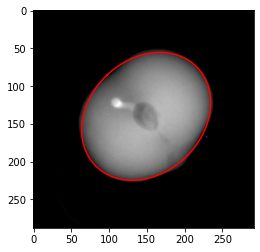

In [ ]:
import matplotlib.pyplot as plt

from pyxvis.processing.segmentation import seg_bimodal
from pyxvis.features.extraction import extract_features
from pyxvis.io.plots import plot_ellipses_image


img = plt.imread('images/N0006_0003b.png') # input image with a fruit
R, _ = seg_bimodal(img)  # segmentation
fxell = extract_features('ellipse',bw=R) # extraction of elliptical features
print('Elliptical Features:')  # show results
print(fxell)  # print elliptical features
plot_ellipses_image(img, fxell)  # draw ellipse onto image

The elliptical features are extracted by function `extract_features` of PyXvis with parameters `ellipse` and `bw=R`, where `R` is the binary image from which the features are extracted. Additionally, the ellipse can be superimposed onto the original X-ray image using function `plot_ellipses_image` of PyXvis to see the estimated ellipse.

# Example 5.3: Invariant moments

In this example, we show how to measure invariant moments that can be used as a shape feature of objects of interest. We tested this approach on an X-ray containing 10 apples. We superimpose onto this image 4 rectangles the size of which is $a \times b$ pixels (where $b=3a$). The rectangles are located in horizontal and vertical directions as shown in the result. Thus, we can simulate an input X-ray image containing apples and rectangles. The idea is to separate them. We see that the first Hu-moment can be used to effectively discriminate apples from rectangles.

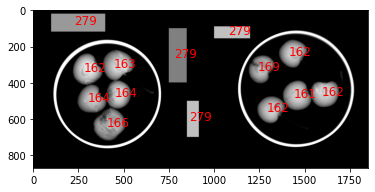

Hu Features:
[[ 2.79269844e-01  5.02170131e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.78888128e-01  5.00078881e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.79269844e-01  5.02170131e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.62091387e-01  3.39641538e-04  1.01449954e-04  1.29613440e-06
  -1.32750022e-11 -2.03144012e-08  6.68412276e-12]
 [ 1.62511380e-01  2.31495542e-04  1.88649432e-04  1.69404653e-06
  -3.02449754e-11 -2.57072630e-08  1.54037077e-12]
 [ 1.62421665e-01  2.93861446e-04  1.29347691e-04  1.46554367e-06
  -1.63641293e-11 -1.07630449e-08  1.18053281e-11]
 [ 1.69301159e-01  2.06379006e-03  8.88690655e-05  2.20118391e-06
  -3.01864184e-11 -9.86463800e-08  6.04867570e-12]
 [ 1.63674728e-01  1.04829194e-03  7.22197545e-05  1.24391190e-06
  -1.02165115e-11 -3.43974286e-08  5.88439607e-12]
 [ 1.61481567e-01  2.46151206e-04  7.51875126e-05  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label
from pyxvis.features.extraction import extract_features

fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.imread('images/N0001_0004b.png')
img[100:399,750:849] = 0.5
img[500:699,850:916] = 0.75
img[20:119,100:399] = 0.6
img[90:156,1000:1199] = 0.75
implot = plt.imshow(img,cmap='gray')    

R = img>0.27   # segmentation
L = label(R)   # labeling
n = np.max(L)  # number of segmented objects
t = 0
T = np.zeros((n, 7))

for i in range(n):
  R = (L == i) * 1  # binary image of object i
  fx = ['basicgeo','hugeo']
  f = extract_features(fx, bw=R) # feature extraction
  area = f[4]
    
  # recognition of fruits according to the size
  if area>10000 and area<31000:
    h = f[18:]  # hu moments
    T[t,:] = h
    t = t + 1
    x = round(1000 * h[0]) # first hu moment
    ax.text(f[1]-20, f[0]+10, str(int(x)), fontsize=12,color='Red')

plt.show()
F = T[0:t,:]
print('Hu Features:')
print(F)
np.save('HuFeatures.npy',F)             # save features

In this example, the features (basic geometric features for centroid and area, and Hu moments) are computed by  function `extract_features` of PyXvis  with parameters `['basicgeo','hugeo']` and `bw=R`, where `R` is the binary image from which the features are extracted. The output of this function is a vector `f` computed by concatenation of two vectors, one for the basic geometric features (of 18 elements) and one for the Hu moments (of 7 elements). Thus, the first Hu moment is stored in `f[18]`. The reader can test Flusser and Gupta moments using functions parameters `'flusser'` and `'gupta'` respectively in function `extract_features`.

# Example 5.4: Intenisty features

In this example, we show how to extract basic intensity features of ten apples.



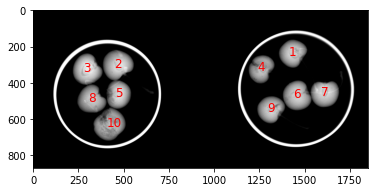

Basic Int-Features:
[[ 5.97390564e-01  1.48199840e-01  2.12642565e+00 -5.08268315e-01
  -1.12537549e-03  3.60309908e-02]
 [ 6.21314523e-01  1.65069755e-01  2.04934173e+00 -3.61325182e-01
  -1.26796994e-03  3.65422341e-02]
 [ 6.60046610e-01  1.74413910e-01  2.22110960e+00 -4.82567213e-01
  -1.17936372e-03  3.97208984e-02]
 [ 5.41639443e-01  1.28334725e-01  2.17818128e+00 -4.04195106e-01
  -1.31330398e-03  3.13098302e-02]
 [ 6.06350114e-01  1.67084076e-01  1.87707870e+00 -3.00941460e-01
  -1.21231089e-03  3.44921519e-02]
 [ 5.99855521e-01  1.49201489e-01  2.09719930e+00 -4.69470013e-01
  -1.12198416e-03  3.55934776e-02]
 [ 6.29405183e-01  1.56278183e-01  2.23710800e+00 -5.71270202e-01
  -1.30564663e-03  4.38084941e-02]
 [ 5.70404639e-01  1.42581478e-01  1.99550043e+00 -3.67717582e-01
  -1.14902548e-03  3.29111699e-02]
 [ 5.89185893e-01  1.47350420e-01  2.05863315e+00 -4.32814809e-01
  -1.25871558e-03  3.54940881e-02]
 [ 5.32133977e-01  1.17461022e-01  2.42283358e+00 -3.96376643e-01
  -1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from pyxvis.features.extraction import extract_features

fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.imread('images/N0001_0004b.png')
implot = plt.imshow(img, cmap='gray')    
R = img > 0.27  # segmentation
L = label(R)  # labeling
n = np.max(L) # number of segmented regions
t = 0
T = np.zeros((n, 6))

for i in range(n):
    R = (L == i) * 1  # binary image of object i
    f = extract_features('basicgeo',bw=R)
    area = f[4]
    # recognition of fruits according to the size
    
    if (area > 14000) and (area < 21000):
    # extract int features only in the segmented region
      h = extract_features('basicint', img=img, bw=R)
      T[t,:] = h
      t = t + 1
      ax.text(f[1]-20, f[0]+10, str(t), fontsize=12,color='Red')

plt.show()
F = T[0:t,:]
print('Basic Int-Features:')
print(F)
np.save('IntFeatures.npy',F) # save features

The basic geometric features are extracted by  function `extract_features` of PyXvis  with parameters `'basicint'`, `img=img`, and `bw=R`, where `img` is the original X-ray image and `R` is the binary image that indicates the pixels where the intensity features are extracted.

# Example 5.5: Defect detection using contrast features

In this example, we show how to detect small defects in an X-ray image of a casting image using area and contrast features. We follow the general block-diagram:

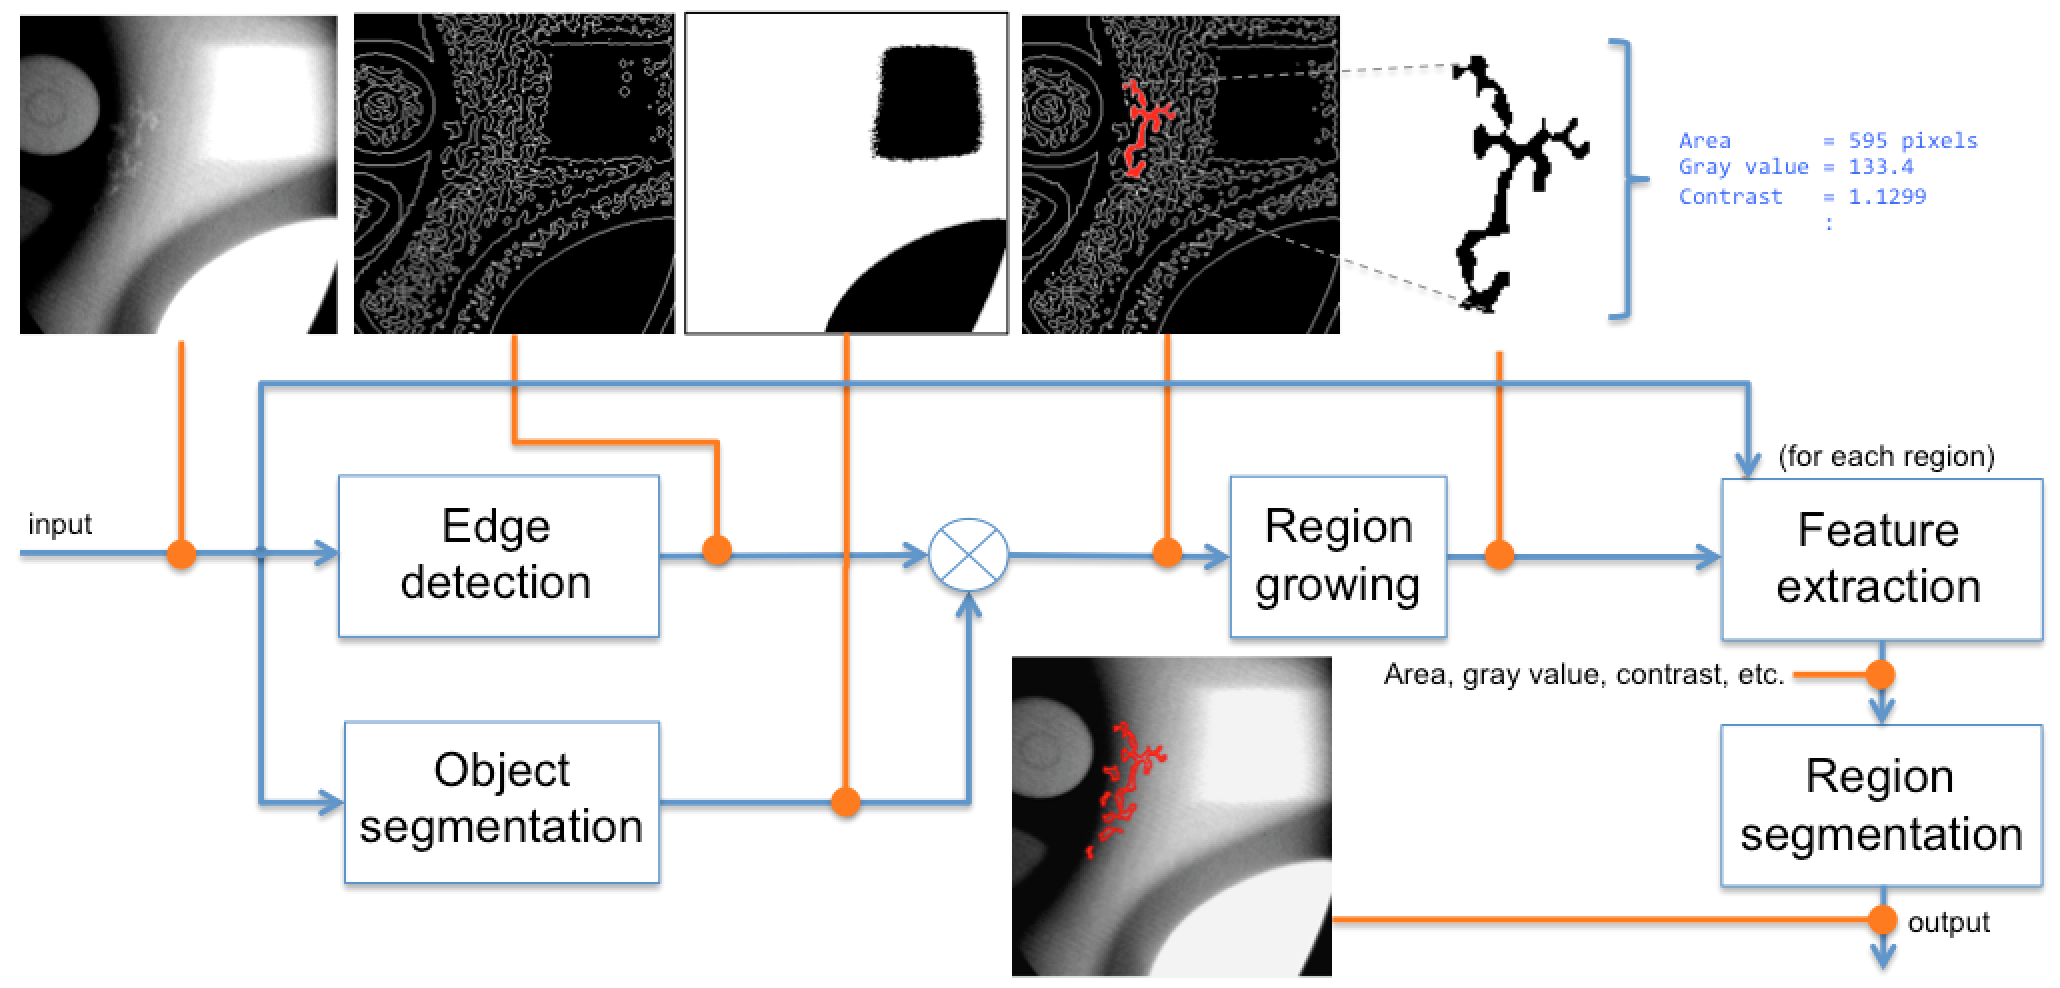

Here, area and contrast features are extracted for each region as defined by enclosed edges. The detection is performed if the size of the region is between some thresholds and the contrast is high enough.

contrast features:
[1.68128645 0.45671165 0.98629677 2.05480467 1.91692261]
area = 29.0 pixels


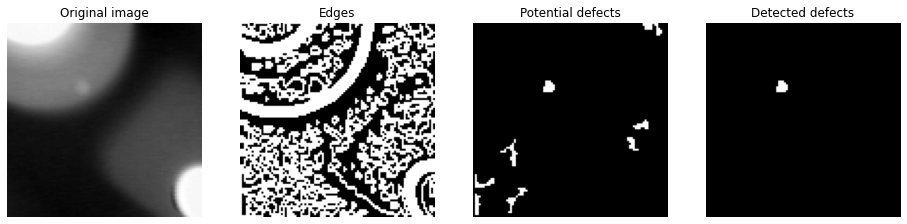

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyxvis.processing.images import gradlog
from skimage.measure import label
from pyxvis.features.extraction import extract_features

img = plt.imread('images/small_wheel.png')  # input image with a defect
(N,M) = img.shape
e = gradlog(img, 1.25, 4/250)
L = label(~e)  # labeling of objects
n  = np.max(L) # number of detected objects

K1 = np.zeros((N,M), dtype=bool)
K2 = np.zeros((N,M), dtype=bool)

# Analysis of each segmented object
for i in range(n):
    R = (L == i)  # binary image of object i
    f = extract_features('basicgeo', bw=R*1)  # feature extraction for object i
    area = f[4]
    # recognition of potential defects according to the size
    if (area > 20) and (area < 40):
        K1 = np.bitwise_or(K1, R)
        i0 = int(round(f[0]))
        j0 = int(round(f[1]))
        h  = int(round(f[2]/2))
        w  = int(round(f[3]/2))
        i1 = max(i0-h, 0)
        j1 = max(j0-w, 0)
        i2 = min(i0+h, N-1)
        j2 = min(j0+w, M-1)
        I  = img[i1:i2, j1:j2]
        bw  = R[i1:i2, j1:j2]
        x  = extract_features('contrast', img=I, bw=bw)
        if (x[3] > 1.5):
            print('contrast features:')
            print(x)
            print('area = '+str(area)+' pixels')
            K2 = np.bitwise_or(K2, R)

fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(e, cmap='gray')
ax[1].set_title('Edges')
ax[1].axis('off')
ax[2].imshow(K1, cmap='gray')
ax[2].set_title('Potential defects')
ax[2].axis('off')
ax[3].imshow(K2, cmap='gray')
ax[3].set_title('Detected defects')
ax[3].axis('off')
plt.show()



# Example 5.6: Crossing line profiles (CLP)
In this example, we show how to detect a very small casting defect that is located at the edge of a regular structure using area and CLP features. We follow the general block-diagram shown in previous example. That is area and contrast features are extracted for each region defined by enclosed edges. The detection is performed in two steps: i) we detect *potential defects*, i.e, regions that are enclosed by edges that have a size between some thresholds, and ii) we select from the potential defects those regions that have a CLP feature high enough. CLP feature is extracted from a window of the image that contains the potential defect in the middle.



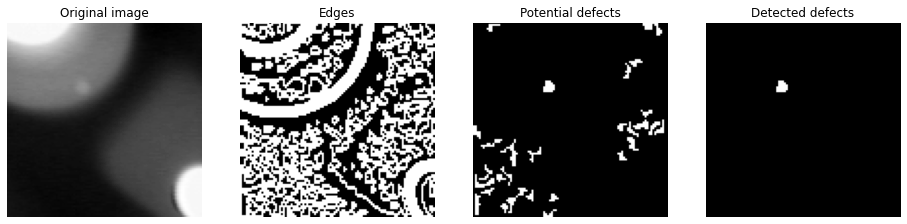

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pyxvis.processing.images import gradlog
from pyxvis.features.extraction import extract_features

from skimage.measure import label


img = plt.imread('images/small_wheel.png')  # input image with a defect
(N,M) = img.shape
e = gradlog(img, 1.25, 4/250)
L = label(~e)  # labeling of objects
n = np.max(L)  # number of detected objects

K1 = np.zeros((N,M), dtype=bool)
K2 = np.zeros((N,M), dtype=bool)

# Analysis of each segmented object
for i in range(n):
    R = L == i  # binary image of object i
    f = extract_features('basicgeo', bw=R*1)  # feature extraction for object i
    area = f[4]

    # recognition of potential defects according to the size
    if (area > 10) and (area < 40):
        K1 = np.bitwise_or(K1, R)
        i0 = int(round(f[0]))
        j0 = int(round(f[1]))
        h  = int(round(f[2] / 2))
        w  = int(round(f[3] / 2))
        i1 = max(i0-h, 0)
        j1 = max(j0-w, 0)
        i2 = min(i0+h, N-1)
        j2 = min(j0+w, M-1)
        I  = img[i1:i2, j1:j2]
        x  = extract_features('clp', img=I)
        if x[5]>0.4:
            K2 = np.bitwise_or(K2, R)

fig, ax = plt.subplots(1, 4, figsize=(16, 8))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')
ax[1].imshow(e, cmap='gray')
ax[1].set_title('Edges')
ax[1].axis('off')
ax[2].imshow(K1, cmap='gray')
ax[2].set_title('Potential defects')
ax[2].axis('off')
ax[3].imshow(K2, cmap='gray')
ax[3].set_title('Detected defects')
ax[3].axis('off')
plt.show()


In this example, the edges are detected using command `gradlog` of PyXvis, that computes the logical "OR" of edge detection using LoG and edge detection by thresholding the gradient. The contrast features are extracted using command `extract_features` of PyXvis  with parameters `'clp'`, `img=I`, where `I` is an image that contains the potential defects in the middle.  In this example we use features $F_1$ of CLP (see details in Section 5.3.3.

# Example 5.7: SIFT

In this example, we find matching points in two views. SIFT keypoints are estimated in each view, and those with the most similar descriptors are matched.

In [ ]:
import numpy as np
import matplotlib.pylab as plt

from pyxvis.io import gdxraydb
from pyxvis.features.descriptors import compute_descriptors, match_descriptors
from pyxvis.io.visualization import plot_matches

image_set = gdxraydb.Baggages()
I1 = image_set.load_image(2, 1)  # Image 1
I2 = image_set.load_image(2, 2)  # Image 2

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))
ax1.imshow(I1, cmap='gray')
ax1.axis('off')
ax2.imshow(I2, cmap='gray')
ax2.axis('off')
fig1.tight_layout()
plt.show()

kp1, desc1 = compute_descriptors(I1, 'sift')  # SIFT descriptor for image 1
kp2, desc2 = compute_descriptors(I2, 'sift')  # SIFT descriptor for image 2

matches = match_descriptors(desc1, desc2, matcher='flann', max_ratio=0.7)  # Matching points using KDTREE

# Display results of matched points
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_matches(ax, I1, I2, kp1, kp2, matches, keypoints_color='lawngreen')
ax.axis('off')
plt.show()


ImportError: ignored

In this example, the SIFT descriptors are detected using `compute_descriptors` of PyXvis with parameter `'sift'`. 


# Example 5.8: Feature selection

The basic syntax of how to use feature selection algorithms in PyXvis is given in this code. 

In [ ]:
# [INPUT]  X  : matrix of training features, one sample per row
#          d  : vector of training labels
#          Xt : matrix of testing features, one sample per row
#          dt : vector of testing labels
#          s  : string with the name of the model
#          p  : number of features to be selected
# [OUTPUT] q  : indices of selected features (columns)
#          X  : new matrix of training features
#          Xt : new matrix of testing features

from pyxvis.features.selection import fse_model, fsel
from pyxvis.io.data import load_features
from sklearn.neighbors import KNeighborsClassifier as KNN  
from pyxvis.io.plots import print_confusion

# Definition of input variables
(X,d,Xt,dt) = load_features('data/F40/F40')
s = 'lda'
p = 5

# Feature selection
(name,params) = fse_model(s)
q = fsel([name,params],X, d, p, cv=5, show=1)
print(str(len(q)) +' from ' + str(X.shape[1]) +' features selected.')

# New training and testing data
X = X[:,q]
Xt = Xt[:,q]

# Classification and Evaluation
clf = KNN(n_neighbors=5)
clf.fit(X, d)
ds = clf.predict(Xt)
print_confusion(dt,ds)

# Example 5.9: Example using intenisty features

In this example, we extract intensity features of small cropped X-ray images (100 \rx 100 pixels) of salmon filets. The cropped images are in series N0002 of GDxray. There are 100 cropped images with fishbones and 100 with no fishbones(*). The original subset has 80 samples per class for training and 20 samples per class per testing. In the training stage of our example, the 80 samples per class are augmented to 320 per class by rotating them in $0^0, 90^0, 180^0$ and $270^0$. The testing samples of our examples correspond to the 20 samples per class of the original dataset (with no augmentation).}. The idea is to select those features that can be relevant for the separation between both classes "fishbones" and "background" (labels 1 and 0 respectively). Using the selected features, we could detect small regions with fishbones in an X-ray image of a salmon filet. In this series, the labels (0 or 1) of the cropped images are available for this supervision task. We initially extract several intensity features (more than 80) and their corresponding labels using function `extract_features_labels` of PyXvis. Additionally, high correlated or constant features are eliminated as well using `clean` function of pybalu Library. Both functions `clean` and `normalize` of pybalu are merged together into function `clean_norm` of PyXvis \ (the indices of the selected `cleaned` and the parameters `a,b` for linear scaling of the features can be used in function `clean_norm_transform` for the testing features). We select 15 features using SFS, we compute the 6 principal components of them using PCA, and finally 3 from them using exhaustive search. The computational time of the feature selection step is short because we are dealing with a small number of features and samples.

(*) In this example we used an augmented version of this subset that is available in folder `images/fishbones`

In [ ]:
import numpy as np
from pybalu.feature_selection import exsearch
from pybalu.feature_transformation import pca
from pybalu.feature_analysis import jfisher
from pyxvis.features.extraction import extract_features_labels
from pyxvis.features.selection import fsel, fse_model, clean_norm, clean_norm_transform
from pyxvis.io.plots import plot_features3, print_confusion
from sklearn.neighbors import KNeighborsClassifier as KNN  

# Training-Data
path = 'images/fishbones/'
fx = ['basicint','gabor-ri','lbp-ri','haralick-2','fourier','dct','hog']
X, d = extract_features_labels(fx,path+'train','jpg')
X, sclean, a, b = clean_norm(X)
(name, params) = fse_model('QDA')
ssfs = fsel([name,params],X,d,15,cv = 5, show = 1)
X = X[:,ssfs]
Ypca, _, A, Mx, _ = pca(X, n_components=6)
X = np.concatenate((X,Ypca), axis=1)
sf = exsearch(X, d, n_features=3 ,method="fisher", show=True)
X = X[:, sf]
print('Jfisher = ' + str(jfisher(X,d)))
plot_features3(X,d,'Fishbones')

# Testing-Data
Xt, dt = extract_features_labels(fx,path+'test','jpg')
Xt = clean_norm_transform(Xt,sclean,a,b)
Xt = Xt[:, ssfs] 
Ytpca = np.matmul(Xt - Mx, A)
Xt = np.concatenate((Xt, Ytpca), axis=1)
Xt = Xt[:, sf]

# Classification and Evaluation
clf = KNN(n_neighbors=5)
clf.fit(X, d)
ds = clf.predict(Xt)
print_confusion(dt,ds)

 In this example, the features were extracted using commands `extract_features_labels`, and the features were selected using `fsel` of PyXvis. This function requires a function that gives a score of the separability. In our case que use function `QDA` of sklearn library. The use of `fsel` is explained in details in previous example.

# Example 5.10: Example using geometric features

This example shows a simple code that is used to extract and select features geometric features. The task is to separate handguns, shuriken and razor blades according to their shapes. For this end we use isolated threat objects that are segmented using `seg_bimodal` segmentation approach of PyXvis. The reader can easily adapt this code to similar recognition problems. In this example, 20 features are selected (we use PCA of three principal components for visualization purposes only).

In [ ]:
# ex_sfs_threatobjects.py: Example of extraction and selection of geometric features

import numpy as np
from pybalu.feature_selection import clean
from pybalu.feature_transformation import normalize, pca
from pyxvis.features.extraction import extract_features_labels
from pyxvis.features.selection import fse_model, fse_sbs, clean_norm, clean_norm_transform
from pyxvis.io.plots import plot_features3, print_confusion
from sklearn.neighbors import KNeighborsClassifier as KNN  

# Training-Data
path = 'images/threatobjects/'
fx = ['basicgeo','ellipse','hugeo','flusser','fourierdes','gupta']
X, d = extract_features_labels(fx,path+'train','jpg',segmentation = 'bimodal')
X, sclean, a, b = clean_norm(X)
(name, params) = fse_model('LDA')
ssbs = fse_sbs([name,params],X,d,20)
X = X[:,ssbs]
Ypca, _, _, _, _ = pca(X, n_components=3)
plot_features3(Ypca, d, 'PCA - Threat Objects', view=(-160, 120))

# Testing-Data
Xt, dt = extract_features_labels(fx, path+'test', 'jpg', segmentation='bimodal')
Xt = clean_norm_transform(Xt, sclean, a, b)
Xt = Xt[:, ssbs] 

# Classification and Evaluation
clf = KNN(n_neighbors=5)
clf.fit(X, d)
ds  = clf.predict(Xt)
print_confusion(dt,ds)